<a href="https://colab.research.google.com/github/Blutronics/BakeryAssociationRule/blob/main/bakery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install kmodes
from kmodes.kmodes import KModes

In [ ]:
df=pd.read_csv('Bakery.csv')
df.head()

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
sns.histplot(df.Items)
sns.set(rc = {'figure.figsize':(22,10)}, font_scale = 0.8)
plt.xticks(list(range(0, len(pd.unique(df.Items))), ), rotation=90, ha = "center")
plt.title("Frequency of Bakery Items")
plt.xlabel("Items")
plt.ylabel("Frequency")
plt.show()

# **Market Basket Analysis for Bakery Items**

In [ ]:
dfti=df[['TransactionNo','Items']]
dfti.head()

In [ ]:
# dfti.TransactionNo.groupby(dfti.Items)

In [ ]:
#dfti=pd.get_dummies(dfti,drop_first=True)
# dfti.head()

In [ ]:

items=[]
for i in dfti.groupby('TransactionNo')['Items'].apply(list):
    items.append(i)
#items

In [ ]:
all_items=[i for item in items for i in item]
#all_items


In [ ]:
from collections import Counter

In [ ]:
item_frequencies=Counter(all_items)
#item_frequencies

In [ ]:
item_frequencies=sorted(item_frequencies.items(),key=lambda x:x[1])
#item_frequencies

In [ ]:
itemfreqs=list(reversed([i[1] for i in item_frequencies]))
item=list(reversed([i[0] for i in item_frequencies]))
itemfreqs[0:12]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
sns.barplot(item[0:12],itemfreqs[0:12])
plt.title("Frequency of Bakery Items")
plt.xlabel("Items")
plt.ylabel("Frequency")
sns.set(rc = {'figure.figsize':(14,10)}, font_scale = 1.5)
# sns.set(font_scale = 2)
sns.set_palette("Paired", 12)
plt.xticks(list(range(0, 12), ), item[0:12],rotation=60)
plt.show()

# **Association Rule**

In [ ]:
item_series=pd.DataFrame(pd.Series(items))
item_series=item_series.iloc[:9465,:]
item_series

In [ ]:
item_series.columns=["transactions"]

In [ ]:
df_dummy=item_series["transactions"].str.join(sep='*').str.get_dummies(sep='*')
dummy_copy=df_dummy
dummy_copy.head()

# currious why we make a copy of the df_dummy dateframe here?

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets=apriori(df_dummy, min_support=0.01, max_len=4, use_colnames=True)

In [ ]:
frequent_itemsets.sort_values('support',ascending=False,inplace=True)

In [ ]:
labels = frequent_itemsets.itemsets[0:11]
labels

In [ ]:
formattedLabels = []
for i in labels:
  i = str(i)
  # print(i[12:-3])
  formattedLabels.append(i[12:-3])

In [ ]:
sns.barplot(formattedLabels,frequent_itemsets.support[0:11])
plt.title("Support of Bakery Combinations Items")
plt.xlabel("Items Combinations")
plt.ylabel("Support")
sns.set(rc = {'figure.figsize':(14,10)}, font_scale = 1.5)
# sns.set(font_scale = 2)
sns.set_palette("Paired", 12)
plt.xticks(list(range(0, 11), ), formattedLabels, rotation=45, ha = "right")
plt.show()

In [ ]:
rules=association_rules(frequent_itemsets,metric="lift",min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending=False).head(10)

In [ ]:
# muDf = df.drop_duplicates()
df_dummy2 = df_dummy
df_dummy2['DayType']= df_drop.DayType
df_dummy2['Daypart']= df_drop.Daypart

In [ ]:
colorrr = ["#69BAF0", "#315770"]
colorrr2 = ["#69BAF0", "#315770","#55D9CE", "#ffffff"]
fig = plt.figure(figsize = (20, 17))
plt.subplot(2, 2, 1)
plt.pie(df.DayType.value_counts(),
        labels = ["Weekday", "Weekend"],
        startangle = 45,
        autopct = '%1.2f%%',
        colors = colorrr,
        shadow = True,
        explode = [0,.03],
        textprops={'color':"black",'fontsize': 14}
        )
plt.title('Total Item Sales by Day of Week',color='black',fontsize= 16)
plt.plot()


plt.subplot(2, 2, 2)


plt.pie(df.Daypart.value_counts(),
        labels = ["Afternoon", "Morning", "Evening","Night"],
        textprops={'color':"black",'fontsize': 14},
        startangle = 45,
        autopct = '%1.2f%%',
        colors = colorrr2,
        shadow = True,
        explode = [0,.03,.03,.2]
        )
plt.plot()
plt.title('Total Item Sales by Time of Day',color='black',fontsize= 16)


plt.subplot(2, 2, 3)
plt.pie(df_dummy2.DayType.value_counts(),
        labels = ["Weekday", "Weekend"],
        startangle = 45,
        autopct = '%1.2f%%',
        colors = colorrr,
        shadow = True,
        explode = [0,.03],
        textprops={'color':"black",'fontsize': 14}
        )
plt.title('Total Transactions by Day of Week',color='black',fontsize= 16)
plt.plot()


plt.subplot(2, 2, 4)


plt.pie(df_dummy2.Daypart.value_counts(),
        labels = ["Afternoon", "Morning", "Evening","Night"],
        textprops={'color':"black",'fontsize': 14},
        startangle = 45,
        autopct = '%1.2f%%',
        colors = colorrr2,
        shadow = True,
        explode = [0,.03,.03,.2]
        )
plt.plot()
plt.title('Total Transaction by Time of Day',color='black',fontsize= 16)

plt.show()


In [ ]:
# dayAvgColor = ["#DE593E", "#756554"]
#61453F
dayAvgColor = ["#DE593E", "#61453F"]
fig = plt.figure(figsize = (20, 10))

plt.subplot(1, 2, 1)

dayAvg = np.array(len(df_dummy2.loc[df_dummy2["DayType"]=="Weekend"])/2), (len(df_dummy2.loc[df_dummy2["DayType"]=="Weekday"])/5)
dayType = []
for i in df.DayType.unique():
  dayType.append(i)

plt.bar(dayType, dayAvg, color=dayAvgColor)
plt.xlabel("DayType")
plt.ylabel("Transactions")
plt.title("Average Sales of DayType")


plt.subplot(1, 2, 2)

plt.pie(dayAvg,
        labels = ["Weekend", "Weekday"],
        textprops={'color':"black",'fontsize': 14},
        startangle = 45,
        autopct = '%1.2f%%',
        colors = dayAvgColor,
        shadow = True,
        # explode = [0,.0]
        )
plt.plot()
plt.title('Total Item Sales by Time of Day',color='black',fontsize= 16)

In [ ]:
# df.Items.value_counts().sum()

In [ ]:
# print('Coffee Proportion =', 5471/20507)
# print('Bread Proportion =', 3325/20507)
# print('Tea Proportion =', 1435/20507)
# print('Cake Proportion =', 1025/20507)
# print('Pastry Proportion =', 856/20507)
# print('Sandwich Proportion =', 771/20507)

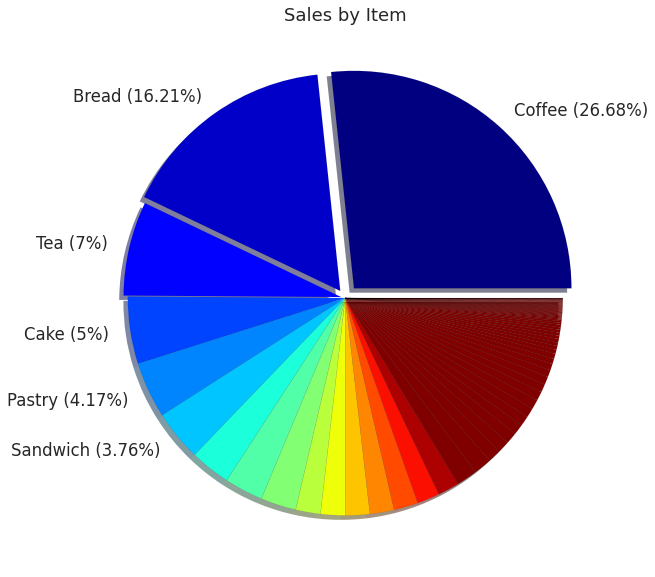

In [173]:



fig, ax = plt.subplots(figsize=(10, 10))

# fig, ax = plt.figure(figsize = (10, 10))
plt.title('Sales by Item')


x = df.Items.value_counts()

theme = plt.get_cmap('jet')
ax.set_prop_cycle("color", [theme(6 * i / len(x))
                             for i in range(len(x))])




# y = np.array([26.68, 16.21, 7, 5, 4.17, 3.76])
mylabels = ["Coffee (26.68%)", "Bread (16.21%)", "Tea (7%)", "Cake (5%)", "Pastry (4.17%)", "Sandwich (3.76%)",'','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','']
myexplode = [0.06, 0.04, 0.02, 0, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

plt.pie(x, 
        labels = mylabels, 
        explode = myexplode, 
        shadow = True,
        wedgeprops = {"edgecolor" : "black",
                      'linewidth': 0.05,
                      'antialiased': True})

plt.show()

I disagree with the with first EDA insight. If you look at the if you look at the average sales Weekends are more profitable. Weekdays only apear more profitable becasue there are 5 days worth of sales. On avaegea weekends have 20% more sales then weekdays. You can say that more then 60% of all sales occur on weekdays, but that is not a accurate representation of the useful information.

# EDA Insights: 

- 0. Weekdays are more profitable, with 60% of sales occurring on weekday days. 
- 1. Fewer that 1% of sales occur during the hours designated as night and only 2.5% during the hours designated as evening:
  - As inconvenient as it might be for the patrons (especially dedicated/ loyal night-time customers), NOT OPERATING DURING THESE HOURS would likely increase profits by decreasing the operational costs (employee salary/ wages, utilities, insurance premiums for operating a cash business during periods more prone to (potentially violent) robbery/ theft, *etc.*) to a degree that more than offsets and loss in sales revenue.
- 2. Folks love coffee, bread, tea, pastries, cakes, & sammiches:
  - INCREASING STOCK & VARIETY of such items might increase sales revenue; 
  - as might CREATING PROMOTIONAL OFFERS tailored to the sale of these items; this insight should dovetail w/ those from the Market-Basket Analysis.

In [ ]:
df.Items = df.Items.replace({'Bread': 0, 'Scandinavian': 1, 'Hot chocolate': 2, 'Jam': 3, 'Cookies': 4,
       'Muffin': 5, 'Coffee': 6, 'Pastry': 7, 'Medialuna': 8, 'Tea': 9, 'Tartine': 10,
       'Basket': 11, 'Mineral water': 12, 'Farm House': 13, 'Fudge': 14, 'Juice': 15,
       "Ella's Kitchen Pouches": 16, 'Victorian Sponge': 17, 'Frittata': 18,
       'Hearty & Seasonal': 19, 'Soup': 20, 'Pick and Mix Bowls': 21, 'Smoothies': 22,
       'Cake': 23, 'Mighty Protein': 24, 'Chicken sand': 25, 'Coke': 26,
       'My-5 Fruit Shoot': 27, 'Focaccia': 28, 'Sandwich': 29, 'Alfajores': 30, 'Eggs': 31,
       'Brownie': 32, 'Dulce de Leche': 33, 'Honey': 34, 'The BART': 35, 'Granola': 36,
       'Fairy Doors': 37, 'Empanadas': 38, 'Keeping It Local': 39, 'Art Tray': 40,
       'Bowl Nic Pitt': 41, 'Bread Pudding': 42, 'Adjustment': 43, 'Truffles': 44,
       'Chimichurri Oil': 45, 'Bacon': 46, 'Spread': 47, 'Kids biscuit': 48, 'Siblings': 49,
       'Caramel bites': 50, 'Jammie Dodgers': 51, 'Tiffin': 52, 'Olum & polenta': 53,
       'Polenta': 54, 'The Nomad': 55, 'Hack the stack': 56, 'Bakewell': 57,
       'Lemon and coconut': 58, 'Toast': 59, 'Scone': 60, 'Crepes': 61, 'Vegan mincepie': 62,
       'Bare Popcorn': 63, 'Muesli': 64, 'Crisps': 65, 'Pintxos': 66, 'Gingerbread syrup': 67,
       'Panatone': 68, 'Brioche and salami': 69, 'Afternoon with the baker': 70,
       'Salad': 71, 'Chicken Stew': 72, 'Spanish Brunch': 73,
       'Raspberry shortbread sandwich': 74, 'Extra Salami or Feta': 75,
       'Duck egg': 76, 'Baguette': 77, "Valentine's card": 78, 'Tshirt': 79,
       'Vegan Feast': 80, 'Postcard': 81, 'Nomad bag': 82, 'Chocolates': 83,
       'Coffee granules': 84, 'Drinking chocolate spoons': 85, 'Christmas common': 86,
       'Argentina Night': 87, 'Half slice Monster': 88, 'Gift voucher': 89,
       'Cherry me Dried fruit': 90, 'Mortimer': 91, 'Raw bars': 92, 'Tacos/Fajita': 93})

In [ ]:
df.Items.unique()

In [ ]:
df

In [ ]:
df.Daypart.unique()

In [ ]:
df.Daypart = df['Daypart'].replace({'Morning': 0, 'Afternoon': 1, 'Evening': 2, 'Night': 3})

In [ ]:
df.Daypart.unique()

In [ ]:
df

In [ ]:
df.DayType.unique()

In [ ]:
df.DayType = df.DayType.replace({'Weekend': 0, 'Weekday': 1})

In [ ]:
df.DayType.unique()

In [ ]:
df

In [ ]:
df.DateTime.unique()

In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

df['DateTime'] = df['DateTime'].dt.strftime('%Y')

# df['DateTime'] = df['DateTime'].dt.strftime('%Y-%m')

In [ ]:
df.DateTime.unique()

In [ ]:
df.DateTime = pd.to_numeric(df.DateTime)

In [ ]:
df.rename(columns = {'DateTime': 'Year', 'Daypart': 'Morning:0, Afternoon:1, Evening:2, Night:3', 'DayType': 'Weekend:0, Weekday:1'}, inplace = True)

In [ ]:
df

## **KMode Cluster**

In [ ]:
df=pd.read_csv('Bakery.csv')

In [ ]:
new_df=df[['TransactionNo','Daypart', 'DayType']]
new_df

In [ ]:
new_df['PartType']=new_df['Daypart']+ ' ' + new_df['DayType']
new_df.head()

In [ ]:
days=[]
for i in new_df.groupby('TransactionNo')['PartType'].apply(list):
    days.append(i)

#days

In [ ]:
df_drop = new_df.drop_duplicates()
df_drop

In [ ]:
days=[]
for i in df_drop.groupby('TransactionNo')['PartType'].apply(list):
    days.append(i)
# df_drop


In [ ]:
df_drop = df_drop.reset_index(drop=True)
df_drop

**Completed dataframe encoding**

In [ ]:
df_dummy['PartType']=df_drop.PartType
df_dummy.head()
#Dataframe for dummy variables and Daytype/DayType

**Compute Number of Clusters for Model using Elbow Curve**

In [172]:
# Elbow curve to find optimal K
data = df_dummy
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 32723.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 32723.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 32723.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 32723.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 32723.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 189, cost: 32281.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1098, cost: 26596.0
Init: initializing centroids
Init: initializing clusters
Starting iter

KeyboardInterrupt: ignored

**Compute Kmodes Model**

In [ ]:
# Building the model with 2 clusters
kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)
clusters

**Add clusters to dataframe**

In [ ]:
kmode.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(kmode.labels_)  # converting numpy array into pandas series object 
data['clust'] = mb # creating a  new column and assigning it to new column 

In [ ]:
data.groupby(data.clust).apply(pd.DataFrame.mode).reset_index(drop=True)

In [ ]:
data.groupby(data.clust).mean()

In [ ]:
fig = plt.figure(figsize = (10, 10))

label = ['Afternoon Weekday', 'Morning Weekday', 'Afternoon Weekend', 'Morning Weekend', 'Evening Weekday','Evening Weekend','Night Weekend','Night Weekday ']

plt.pie(df_dummy["PartType"].value_counts(),
        shadow = True,
        autopct='%1.1f%%',
        pctdistance=1.5,
        labels = label,
        labeldistance=2,
        explode = [0,0,0,0,0,0,0,0])
plt.title('Sales based on purchase time')
plt.show()

In [ ]:
# df_dummy["PartType"].value_counts()

In [ ]:
# df_dummy.head()
# df_dummy.Coffee

In [ ]:
df_dummy2 = df_dummy
df_dummy2['DayType']= df_drop.DayType
df_dummy2['Daypart']= df_drop.Daypart
# df_dummy2.head()

In [ ]:
# fig, ax = plt.subplots()
# fig.set_size_inches(20, 8.27)
# plt.xticks(rotation=45, ha="right")
# ax = sns.barplot(x="PartType", y="Coffee", hue="PartType", data=df_dummy)

In [ ]:
# brpDf = df
# brpDf = df.drop_duplicates()
# brpDf.drop(columns = "DateTime", inplace = True)
# one_hot = pd.get_dummies(brpDf['Items'])
# brpDf = brpDf.drop('Items',axis = 1)
# brpDf = brpDf.join(one_hot)
# brpDf

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(20, 20))

fig.suptitle('Top Selling Items by DayType')

sns.barplot(ax=axes[0], x="Daypart", y="Coffee", hue="DayType", data=df_dummy2, palette = "ch:s=-.1,r=.8")
sns.barplot(ax=axes[1], x="Daypart", y="Bread", hue="DayType", data=df_dummy2, palette = "ch:s=-.1,r=.8")
sns.barplot(ax=axes[2], x="Daypart", y="Tea", hue="DayType", data=df_dummy2, palette = "ch:s=-.1,r=.8")

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(20, 20))

fig.suptitle('Top Selling Items by Daypart')

sns.barplot(ax=axes[0],x="DayType", y="Coffee", hue="Daypart", data=df_dummy2,  palette="icefire")
sns.barplot(ax=axes[1],x="DayType", y="Bread", hue="Daypart", data=df_dummy2,  palette="icefire")
sns.barplot(ax=axes[2],x="DayType", y="Tea", hue="Daypart", data=df_dummy2, palette="icefire")